In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, concatenate
from tensorflow.keras import regularizers
from google.colab import drive
import matplotlib.pyplot as plt


In [ ]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!gdown https://drive.google.com/file/d/1f6jT_MSh9D5srF1-gLD-AKuCnDs-EzwF/view?usp=share_link

/usr/local/lib/python3.7/dist-packages/gdown/parse_url.py:39: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1f6jT_MSh9D5srF1-gLD-AKuCnDs-EzwF
  url="https://drive.google.com/uc?id={}".format(file_id)
Downloading...
From: https://drive.google.com/file/d/1f6jT_MSh9D5srF1-gLD-AKuCnDs-EzwF/view?usp=share_link
To: /content/view?usp=share_link
71.5kB [00:00, 11.5MB/s]


In [ ]:
!unzip "/content/drive/MyDrive/DL_Assignment_1_Data.zip" -d "/content/drive/MyDrive/"

In [ ]:
train_path="/content/drive/MyDrive/Data/train"
test_path="/content/drive/MyDrive/DL/Data/test"

In [ ]:
#add data augmentaion to the training data since the data is too small
trainset=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
     zoom_range=0.2,
     vertical_flip=True,
     brightness_range=(0.2, 0.8),
     validation_split=0.1
)

In [ ]:
#get the data from the training directory and determine the pictures characteristics 
#set the training percentage to be 90% of the data 
train=trainset.flow_from_directory(
    directory=train_path,
    target_size=(192, 192),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset="training",
)

Found 11524 images belonging to 104 classes.


In [ ]:
#get the data from the training directory and determine the pictures characteristics 
#set the validation data percentage to be 10% of the data 
valid=trainset.flow_from_directory(
    directory=train_path,
    target_size=(192, 192),
    color_mode='rgb',
    # classes=train_labels,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset="validation"

)

Found 1229 images belonging to 104 classes.


# **VGG Model**

In [ ]:
#vgg
vgg = Sequential()
vgg.add(Conv2D(input_shape = (192, 192, 3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))

vgg.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

vgg.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

vgg.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

vgg.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

vgg.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
vgg.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

vgg.add(Flatten())
vgg.add(Dense(units = 4096, activation = "relu"))
vgg.add(Dense(units = 4096, activation = "relu"))
vgg.add(Dense(units = 104, activation = "softmax"))

In [ ]:
vgg.compile(optimizer=Adam(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics="accuracy")

In [ ]:
vgg.load_weights("/content/drive/MyDrive/DL/vgg_param/")

In [ ]:
vgg_hist = vgg.fit(train,epochs=5,batch_size=32,validation_data=valid)

Epoch 1/5
361/361 [==============================] - 194s 536ms/step - loss: 0.1632 - accuracy: 0.9518 - val_loss: 3.4927 - val_accuracy: 0.4736
Epoch 2/5
361/361 [==============================] - 195s 540ms/step - loss: 0.1603 - accuracy: 0.9537 - val_loss: 3.6349 - val_accuracy: 0.4540
Epoch 3/5
361/361 [==============================] - 193s 535ms/step - loss: 0.1575 - accuracy: 0.9538 - val_loss: 3.5846 - val_accuracy: 0.4793
Epoch 4/5
361/361 [==============================] - 191s 529ms/step - loss: 0.1375 - accuracy: 0.9586 - val_loss: 3.4197 - val_accuracy: 0.4638
Epoch 5/5
361/361 [==============================] - 188s 521ms/step - loss: 0.1312 - accuracy: 0.9613 - val_loss: 3.5073 - val_accuracy: 0.4565


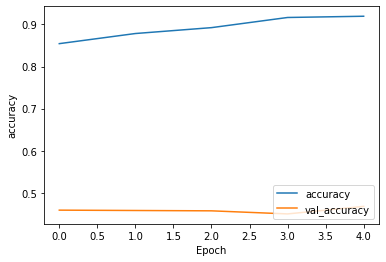

In [ ]:
plt.plot(vgg_hist.history['accuracy'], label='accuracy')
plt.plot(vgg_hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right');

In [ ]:
vgg.save_weights('/content/drive/MyDrive/DL/vgg_param/')


In [ ]:
vgg.save("/content/drive/MyDrive/DL/vgg_model/")